In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
employee_ids=[f"EMP_{i:03d}"for i in range(1,31)]
dates=pd.date_range("2052-07-01",periods=30,freq="D")

In [5]:
data={"Date":np.tile(dates,len(employee_ids)),
      "Employee_ID":np.repeat(employee_ids,len(dates)),
      "Working_Hours":np.random.uniform(4,10,size=len(dates)*len(employee_ids)).round(2)
}

In [6]:
df=pd.DataFrame(data)

In [7]:
df.to_csv("employee_working_hours.csv",index=False)

In [8]:
df_csv=pd.read_csv("employee_working_hours.csv")

In [10]:
row=df.iloc[52]
row

,52
Date,2052-07-23 00:00:00
Employee_ID,EMP_002
Working_Hours,9.64


In [9]:
print(df_csv.head())
print(df_csv.describe())
print(df_csv["Employee_ID"].nunique())

         Date Employee_ID  Working_Hours
0  2052-07-01     EMP_001           6.25
1  2052-07-02     EMP_001           9.70
2  2052-07-03     EMP_001           8.39
3  2052-07-04     EMP_001           7.59
4  2052-07-05     EMP_001           4.94
       Working_Hours
count     900.000000
mean        6.954233
std         1.762088
min         4.030000
25%         5.387500
50%         7.010000
75%         8.490000
max        10.000000
30


grouping and aggregation. Total hours per employee

In [11]:
total_hours=df_csv.groupby("Employee_ID")["Working_Hours"].sum().sort_values(ascending=False)

Average daily hours per employee

In [12]:
avg_daily=df_csv.groupby("Employee_ID")["Working_Hours"].mean()

In [14]:
threshold_low=5
threshold_high=9
df_csv["Low_Hour_Flag"]=df_csv["Working_Hours"]<threshold_low
df_csv["High_Hour_Flag"]=df_csv["Working_Hours"]>threshold_high
print(df[df_csv["Low_Hour_Flag"]|
df_csv["High_Hour_Flag"]].head())


        Date Employee_ID  Working_Hours
1 2052-07-02     EMP_001           9.70
4 2052-07-05     EMP_001           4.94
5 2052-07-06     EMP_001           4.94
6 2052-07-07     EMP_001           4.35
7 2052-07-08     EMP_001           9.20


Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

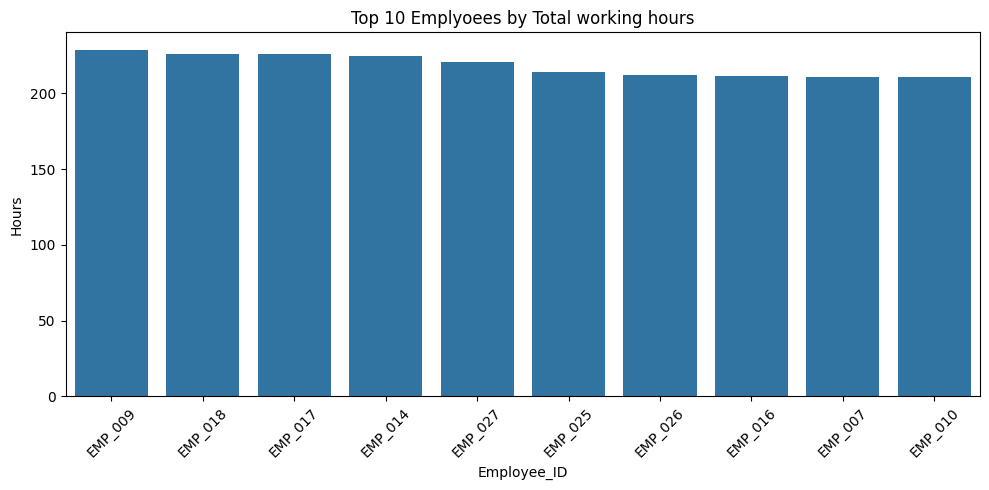

In [16]:
top10=total_hours.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.index,y=top10.values)
plt.xticks(rotation=45)
plt.title("Top 10 Emplyoees by Total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()

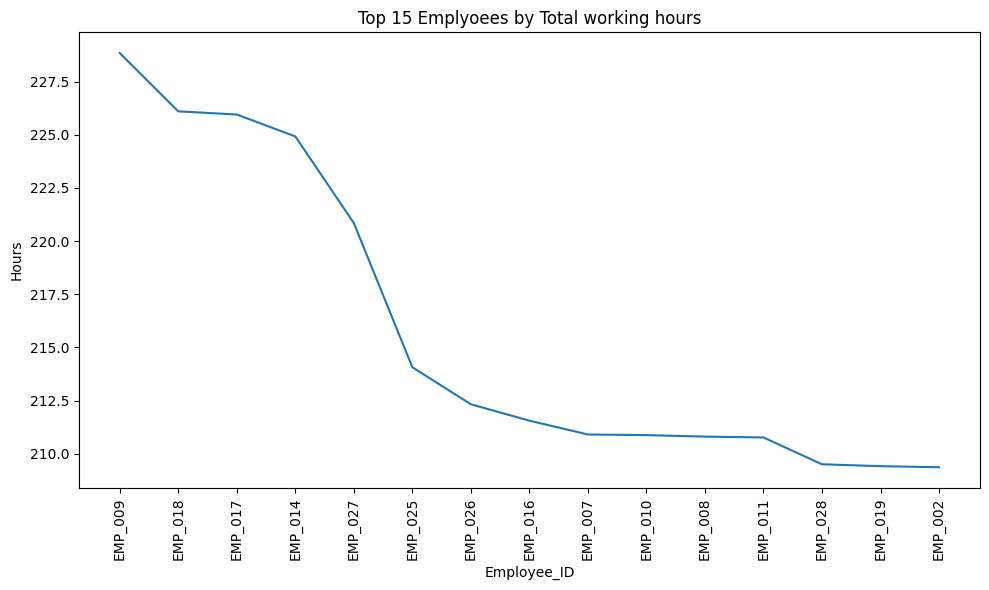

In [19]:
top10=total_hours.head(15)
plt.figure(figsize=(10,6))
sns.lineplot(x=top10.index,y=top10.values)
plt.xticks(rotation=90)
plt.title("Top 15 Emplyoees by Total working hours")
plt.ylabel("Hours")
plt.tight_layout()
plt.show()